In [1]:
import pandas as pd
import numpy as np
dfGDP = pd.read_csv("./data/population_gdp.csv",thousands=',')
dfCO2 = pd.read_csv("./data/bp-stats-review-2022-consolidated-dataset-narrow-format.csv",thousands=',')
dfCO2

,Country,Year,ISO3166_alpha3,ISO3166_numeric,Region,SubRegion,OPEC,EU,OECD,CIS,Var,Value
0,Brazil,2004,BRA,76.0,S. & Cent. America,South America,0.0,0.0,0.0,0.0,biodiesel_cons_kboed,0.000000
1,Brazil,2005,BRA,76.0,S. & Cent. America,South America,0.0,0.0,0.0,0.0,biodiesel_cons_kboed,0.014737
2,Brazil,2006,BRA,76.0,S. & Cent. America,South America,0.0,0.0,0.0,0.0,biodiesel_cons_kboed,1.016887
3,Brazil,2007,BRA,76.0,S. & Cent. America,South America,0.0,0.0,0.0,0.0,biodiesel_cons_kboed,5.953947
4,Brazil,2008,BRA,76.0,S. & Cent. America,South America,0.0,0.0,0.0,0.0,biodiesel_cons_kboed,16.534379
...,...,...,...,...,...,...,...,...,...,...,...,...
277090,Vietnam,2017,VNM,704.0,Asia Pacific,Asia Pacific,0.0,0.0,0.0,0.0,wind_twh_net,0.346500
277091,Vietnam,2018,VNM,704.0,Asia Pacific,Asia Pacific,0.0,0.0,0.0,0.0,wind_twh_net,0.482130
277092,Vietnam,2019,VNM,704.0,Asia Pacific,Asia Pacific,0.0,0.0,0.0,0.0,wind_twh_net,0.714780
277093,Vietnam,2020,VNM,704.0,Asia Pacific,Asia Pacific,0.0,0.0,0.0,0.0,wind_twh_net,1.063052


将二氧化碳数据集中，中国和美国的年份对应的总排放量的行以及对应字段分别挑出来建表

In [2]:
dfUSACO2 = dfCO2[(dfCO2.ISO3166_alpha3.str.contains("USA")) & (dfCO2.Var == "co2_combust_mtco2")]
dfCHNCO2 = dfCO2[(dfCO2.ISO3166_alpha3.str.contains("CHN")) & (dfCO2.Var == "co2_combust_mtco2")]
dfCHNCO2 = dfCHNCO2[['Year','Value']]
dfUSACO2 = dfUSACO2[['Year','Value']]

新建函数extract用于对数据集进行处理

In [3]:
def extract(x):
    a = ''
    flag = 0
    for ch in str(x):
        if ch == ')':
            return int(a)
        if flag == 1:
            a = a+ch
        if ch == '(':
            flag = 1
    if np.isnan(float(x)):
        return 0
    return int(x)
extract('3.32亿 (331501080)')

331501080

对整个GDP数据集进行数字的提取

In [4]:
dfGDP = dfGDP.dropna()
dfGDP = dfGDP.applymap(lambda x: extract(x))
dfGDP

,年份,中国人口,美国人口,中国人均GDP(美元计),美国人均GDP(美元计)
0,2021,1412360000,331893745,12556,70248
1,2020,1411100000,331501080,10408,63530
2,2019,1407745000,328329953,10143,65120
3,2018,1402760000,326838199,9905,62823
4,2017,1396215000,325122128,8816,59907
...,...,...,...,...,...
57,1964,698355000,191889000,85,3573
58,1963,682335000,189242000,74,3374
59,1962,665770000,186538000,70,3243
60,1961,660330000,183691000,75,3066


精简字段

In [5]:
dfUSAGDP= dfGDP[['年份','美国人口','美国人均GDP(美元计)']]
dfCHNGDP= dfGDP[['年份','中国人口','中国人均GDP(美元计)']]
dfCHNGDP

,年份,中国人口,中国人均GDP(美元计)
0,2021,1412360000,12556
1,2020,1411100000,10408
2,2019,1407745000,10143
3,2018,1402760000,9905
4,2017,1396215000,8816
...,...,...,...
57,1964,698355000,85
58,1963,682335000,74
59,1962,665770000,70
60,1961,660330000,75


连接表，表示中国在某年份的人口、人均GDP、国家总排放

In [6]:
dfCHN = dfCHNGDP.set_index('年份').join(dfCHNCO2.set_index('Year'))
dfCHN= dfCHN.reset_index()
dfCHN.columns = ['Year','Population','GDP','CO2']
dfCHN= dfCHN.dropna()

美国version

In [7]:
dfUSA = dfUSAGDP.set_index('年份').join(dfUSACO2.set_index('Year'))
dfUSA= dfUSA.reset_index()
dfUSA.columns = ['Year','Population','GDP','CO2']
dfUSA = dfUSA.dropna()

对中美的GDP以及人均二氧化碳排放量进行绘图可视化分析

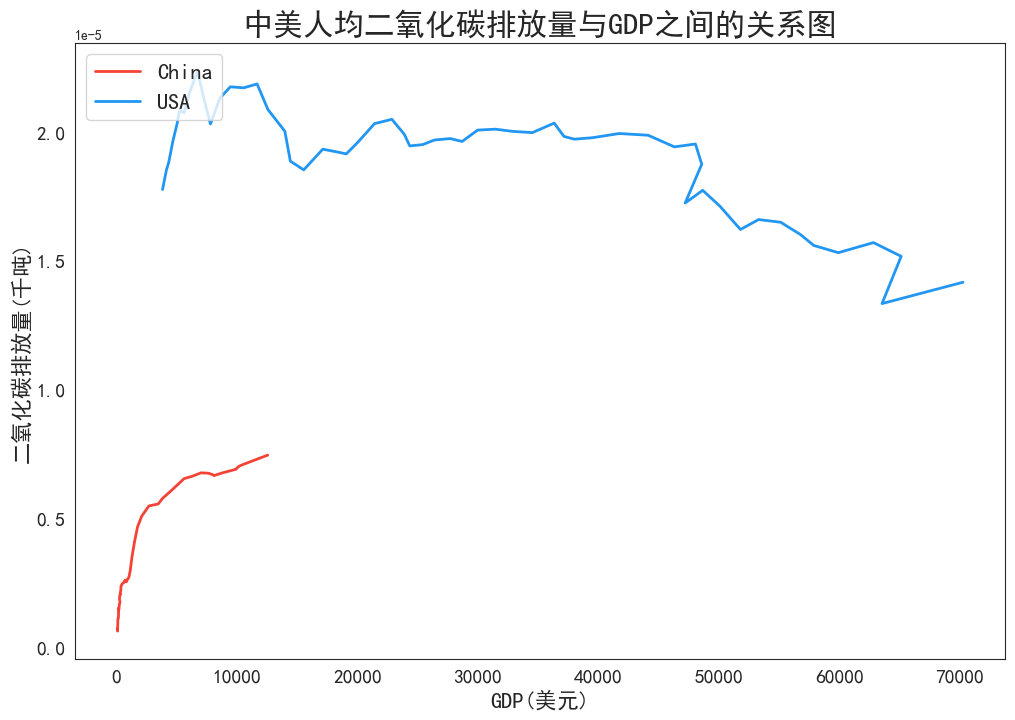

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


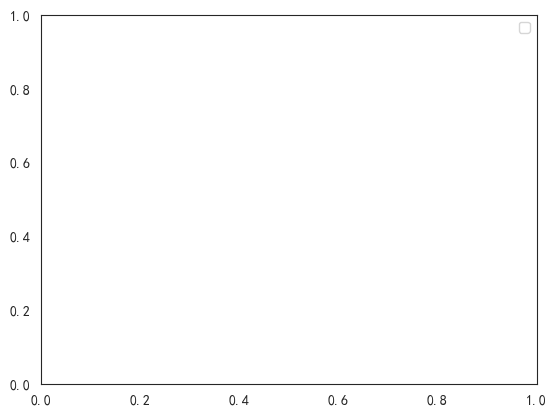

In [19]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc("font",family='SimHei')
matplotlib.rcParams['axes.unicode_minus']=False
import seaborn as sns

year = np.array(dfCHN.Year)
chngdp = np.array(dfCHN.GDP)
usagdp = np.array(dfUSA.GDP)
chnco2 = np.array(dfCHN.CO2/dfCHN.Population)
usaco2 = np.array(dfUSA.CO2/dfUSA.Population)

plt.figure(figsize=(12,8))
sns.set_style("white")
sns.despine(left=True, bottom=True)

plt.plot(chngdp, chnco2, color='#F44336', label='China', linewidth=2)
plt.plot(usagdp, usaco2, color='#2196F3', label='USA', linewidth=2)
# plt.fill_between(chngdp, 0, chnco2, alpha=0.2, color='#F44336')
# plt.fill_between(usagdp, 0, usaco2, alpha=0.2, color='#2196F3')
plt.title('中美人均二氧化碳排放量与GDP之间的关系图', fontsize=22, fontweight='bold')
plt.xlabel('GDP(美元)', fontsize=16)
plt.ylabel('二氧化碳排放量(千吨)', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=16, loc='upper left')

plt.show()

plt.legend()
plt.show()

挑出中美发展进度类似的一段时间，对这段时间内两国的人均二氧化碳排放量进行可视化分析

<Figure size 1600x1200 with 0 Axes>

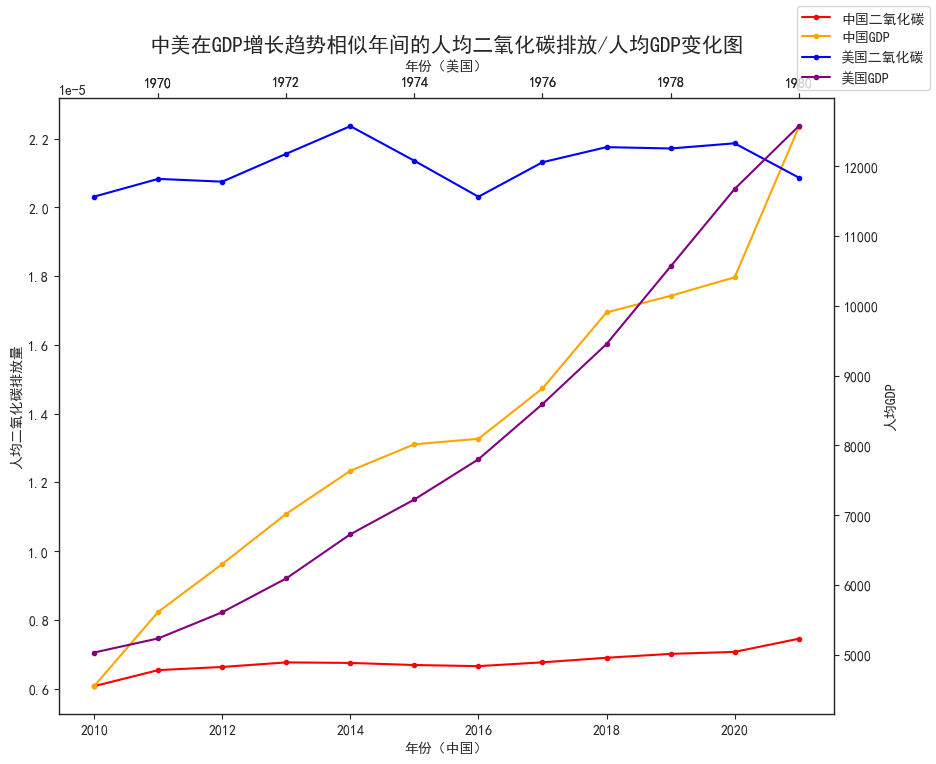

In [20]:
dfCHN1 = dfCHN.loc[range(11,-1,-1)]
dfUSA1 = dfUSA.loc[range(52,40,-1)]
year_ = np.array(range(12))
year1 = np.array(dfCHN1.Year)
year2 = np.array(dfUSA1.Year)
CHNCO2 = np.array(dfCHN1.CO2/dfCHN1.Population)
USACO2 = np.array(dfUSA1.CO2/dfUSA1.Population)
chngdp1 = np.array(dfCHN1.GDP)
usagdp1 = np.array(dfUSA1.GDP)

plt.figure(figsize=(16,12))
fig, ax1 = plt.subplots(figsize = (10,8))
plt.title('中美在GDP增长趋势相似年间的人均二氧化碳排放/人均GDP变化图',fontsize=15,fontweight='bold')
ax1.set_xlabel('年份（中国）')
ax1.set_ylabel('人均二氧化碳排放量')
ax1.plot(year1,CHNCO2,color='red',label='中国二氧化碳',marker = '.' )
ax2 = ax1.twinx()
ax2.set_ylabel('人均GDP')
ax2.plot(year1,chngdp1,color='orange',label='中国GDP',marker = '.'  )
ax3 = ax1.twiny()
ax3.set_xlabel('年份（美国）')
ax3.plot(year2,USACO2,color='blue',label='美国二氧化碳' ,marker = '.' )
ax4 = ax2.twiny()
ax4.plot(year2,usagdp1,color='purple',label='美国GDP',marker = '.'  )
fig.legend(loc='upper right')

plt.show()